# Magnotether Experimental Comparison Between Looping and Static LED

This jupyter notebook will display figures and statistics regarding this comparison and try to develop some conclusions regarding this analysis.

All figures are developed will be placed in the figs folder labeled based on the section number within the notebook. 

`Ex: Fig-1_1 which corresponds to Figure from the first subsection of section 1`

See the Table of contents below in order to navigate to the different sections of the notebook.

### VERSION NOTICE (v1.0)
- Current version is meant to have a working base comparison method
- Next version will focus on the method of duplication and creation of fresh directory for the user to work and to ensure that the baseline file is in a read-only mode but the user will be able to edit subsequent copies...

## Table of Contents

-------------------------------------------------
[Import Relevant Packages](#import-libraries)

-------------------------------------------------
[1. Static Data Analysis](#1-static-data-analysis)

> [1.1 Static Data Import](#11-data-import)

> [1.2 Initial Plot of Static Experiment](#12-initial-plot-of-static-experiment)

> [1.3 Plot of Female Fly Data](#13-plot-of-female-fly-data)

> [1.4 Plot of Female Fly Data Relative to LED](#14-plot-of-female-fly-data-relative-to-led)

> [1.5 Polar Plot Female Fly Data (Relative to LED)](#15-polar-plot-female-fly-data-relative-to-led)

----------------------------------------------------
[2. Loop Data Analysis](#2-loop-data-analysis)

> [2.1 Loop Data Import](#21-data-import)

> [2.2 Initial Plot of Section of Loop Experiment](#22-initial-plot-of-section-of-loop-experiment)

> [2.3 Plot of Female Fly Data Relative To LED](#23-plot-of-female-fly-data-relative-to-led)

> [2.4 Offset Plot for Loop Data](#24-offset-plot-for-loop-data)

> [2.5 Polar Plot (Relative to LED)](#25-offset-plot-polar-plot)


#### (Optional) Additional Information For Data Access
> For using this jupyter notebook a lot of the analysis considers images located on an external machine (unless you are currently using that machine). This notebook thus has data import methods for both external access and direct access of the image files.

For the external access ensure that the following is completed... However, the majority of analysis images that will be analyzed will be included within this repo. The inital formulation of these images and getting more images saved directly will require the external access which is why it is recommended that the following steps are followed:

1. Set mount point in home directory
```
mkdir magno_mount
```

2. Using SSHFS set the mount
```
sshfs flyranch@IPADDRESS: /home/username/magno_mount/
```

3. Connection has been established now you can navigate to the proper directory

This will be done later within this notebook as well for the access of the images, but if you are wanting to look at some of these 
images on your own machine within the mount point this is the directory that will be used
```
cd image_data/20231121/fly1/20231121124749/
```

With the relevant dependancies and connections established, proceed through the rest of the notebook.

## Import Libraries

In [1]:
import sys
import os
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
# plot_dir = os.path.join(current_dir,'plotting')
sys.path.append(current_dir)
# print(sys.path)
from lib.plotting import polarplot as polarplt# polar plotting module
from lib.parsing import basic_sections as bsc_sec # basic data parsing methods
from lib.parsing.data_range import find_startdata, find_enddata # setting start and end of analysis region 
from lib.parsing.exact_exp_groups import sub_exp_group  # more dataparsing methods
from lib.led_convert import get_LED_angle_in_rad

c:\Users\lkrow\vscodeProjects\My-Repos-Warren-Lab\flyplot
Initialized Plotting Package
Initialized Parsing Package


## 1. Static Data Analysis

#### 1.1 Data Import

In [2]:
# data source
fem_dat_static ='data/20231228154547.txt'
# female fly heading and led position data
df_fem_static = pd.read_csv(fem_dat_static, names = ['time','fly heading','led position'],sep = " ")

# compute change over time
df_fem_static['delta-t'] = df_fem_static['time'] - df_fem_static['time'][0] 

# compute LED position in degrees
df_fem_static['led angle'] = np.rad2deg(get_LED_angle_in_rad(df_fem_static['led position'])) 

# get subgroups
fem_dict_static = sub_exp_group(df_fem_static)
print(fem_dict_static)
print(len(fem_dict_static))

-1 -1 [0, 8]
150 150 [8, 911]
stat
[911, None]
stat
0
50 50 [911, 2778]
14 14 [2778, 4645]
121 121 [4645, 6545]
87 87 [6545, 8378]
150 150 [8378, 9302]
{'cali1': [0, 8], 'dark1': [8, 911], 'stat1': [911, 2778], 'stat2': [2778, 4645], 'stat3': [4645, 6545], 'stat4': [6545, 8378], 'dark2': [8378, 9302]}
7


#### 1.2 Initial Plot of Static Experiment -> Current Issue is an incorrect Capture of Data! DO DOUBLE CHECK ON THIS AGAIN!

Text(0, 0.5, 'Heading/LED Angle')

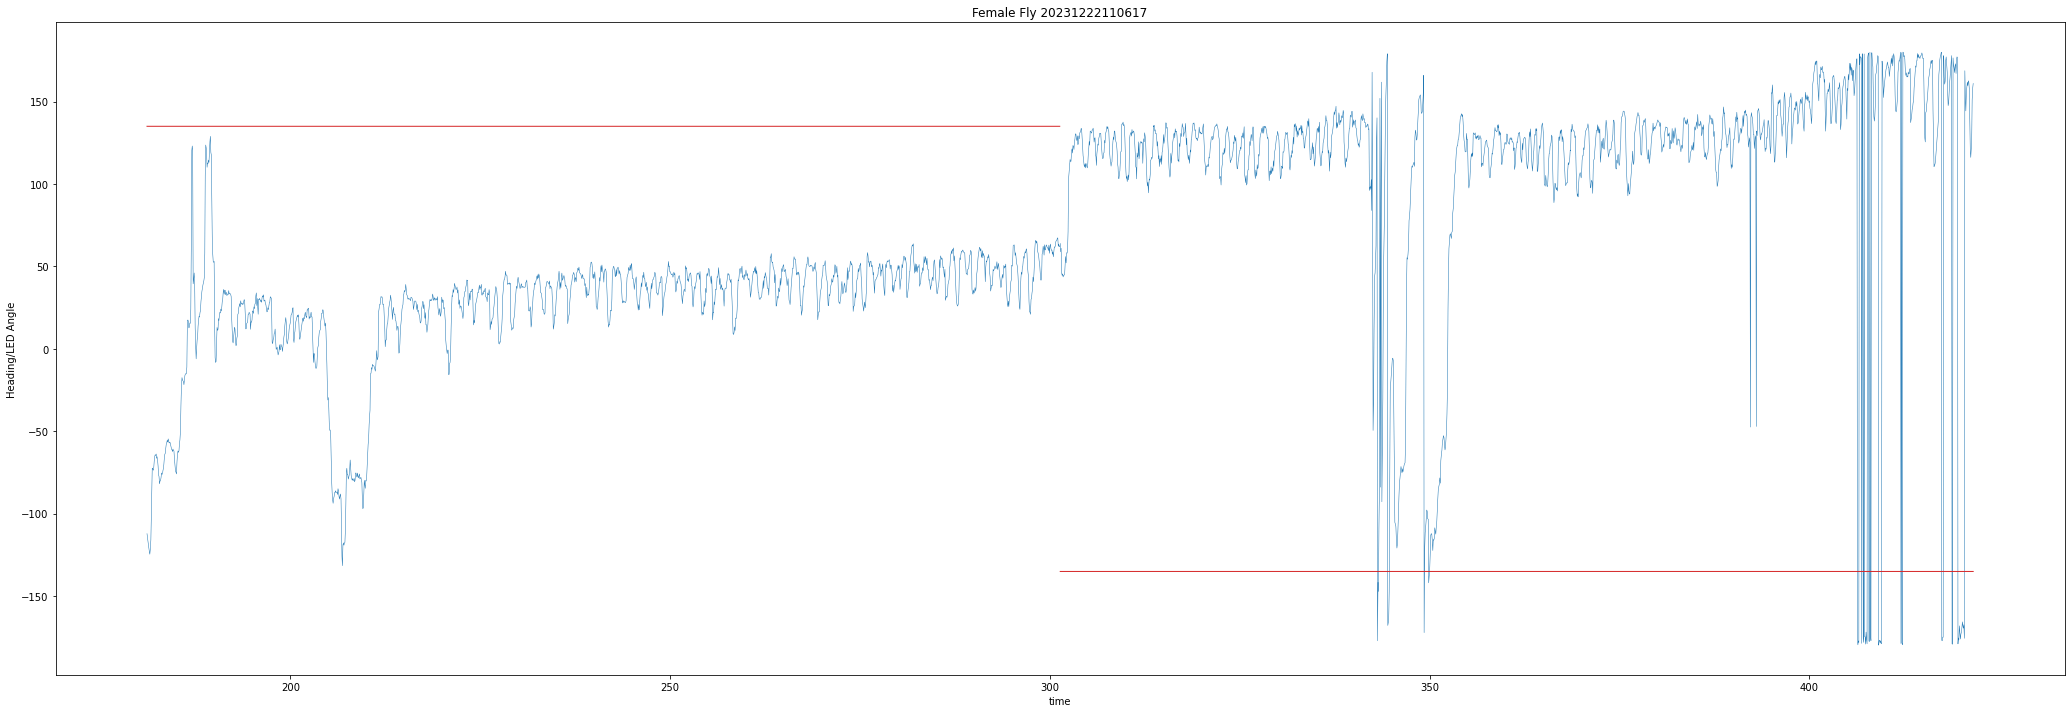

In [3]:
plt.figure(figsize=(36,12))
# iterate over the sections
for k in list(fem_dict_static.keys())[3:5]:
    start = fem_dict_static[k][0]
    end = fem_dict_static[k][1]
    # print(start,end)
    plt.plot(df_fem_static['delta-t'][start:end],df_fem_static['fly heading'][start:end],color = 'tab:blue', linewidth = .5, label = 'Heading')
    plt.plot(df_fem_static['delta-t'][start:end],df_fem_static['led angle'][start:end],color = 'tab:red', linewidth = 1, label = 'LED')
plt.title("Female Fly 20231222110617")
plt.xlabel("time")
plt.ylabel("Heading/LED Angle")

#### 1.3 Plot of Female Fly Data

#### 1.4 Plot of Female Fly Data Relative to LED

#### 1.5 Polar Plot Female Fly Data (Relative to LED)

## 2. Loop Data Analysis -> Apply additional algorithm for fixing the jumps up that should be wrapping..

#### 2.1 Data Import

In [2]:
# data source
fem_dat_loop ='data/20231121124749.txt'
# convert to dataframe
df_fem_loop = pd.read_csv(fem_dat_loop, names = ['time','fly heading','led position'],sep = " ")

# compute change over time
df_fem_loop['delta-t'] = df_fem_loop['time'] - df_fem_loop['time'][0] 

# compute LED position in degrees
df_fem_loop['led angle'] = np.rad2deg(get_LED_angle_in_rad(df_fem_loop['led position'])) 

# get subgroups
fem_dict_loop = sub_exp_group(df_fem_loop)
print(fem_dict_loop)
print(len(fem_dict_loop))

-1 -1 [0, 9]
dark
[9, None]
150 150 [9, 946]

147
3 3 [946, 1075]
3 3 [1074, 1202]
3 4 [1201, 1331]
4 3 [1330, 1456]
3 3 [1455, 1583]
3 3 [1582, 1707]
3 3 [1706, 1836]
3 3 [1835, 1964]
3 3 [1963, 2091]
3 3 [2090, 2217]
3 3 [2216, 2344]
3 3 [2343, 2471]
3 3 [2470, 2599]
3 3 [2598, 2727]
3 50 [2726, 2763]
50 50 [2762, 4688]
3 3 [4688, 4813]
3 3 [4812, 4937]
3 4 [4936, 5063]
4 3 [5062, 5188]
3 3 [5187, 5316]
3 3 [5315, 5444]
3 3 [5443, 5571]
3 3 [5570, 5698]
3 3 [5697, 5825]
3 3 [5824, 5953]
3 3 [5952, 6079]
3 4 [6078, 6203]
4 3 [6202, 6326]
3 3 [6325, 6449]
3 14 [6448, 6485]
14 14 [6484, 8383]
150 150 [8383, 9312]
{'cali1': [0, 9], 'dark1': [9, 946], 'loop1': [946, 1075], 'loop2': [1074, 1202], 'loop3': [1201, 1331], 'loop4': [1330, 1456], 'loop5': [1455, 1583], 'loop6': [1582, 1707], 'loop7': [1706, 1836], 'loop8': [1835, 1964], 'loop9': [1963, 2091], 'loop10': [2090, 2217], 'loop11': [2216, 2344], 'loop12': [2343, 2471], 'loop13': [2470, 2599], 'loop14': [2598, 2727], 'loop15': [2726, 

#### 2.2 Initial Plot of Section of Loop Experiment

Text(0, 0.5, 'Heading/LED Angle')

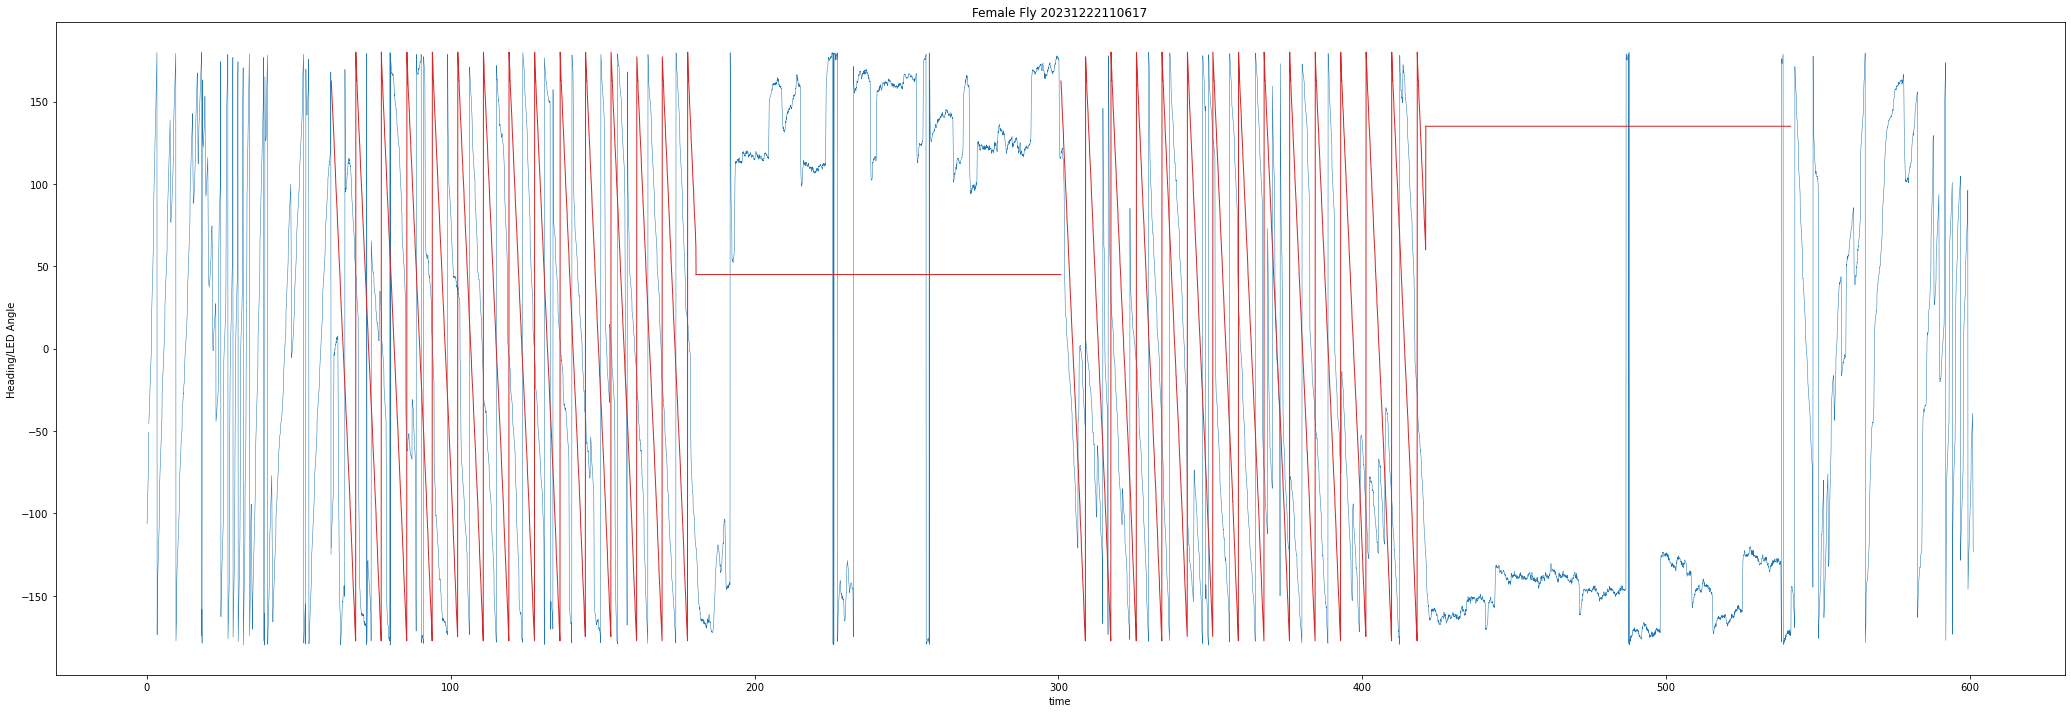

In [3]:
plt.figure(figsize=(36,12))
# iterate over the sections
for k in list(fem_dict_loop.keys()):
    start = fem_dict_loop[k][0]
    end = fem_dict_loop[k][1]
    # print(start,end)
    plt.plot(df_fem_loop['delta-t'][start:end],df_fem_loop['fly heading'][start:end],color = 'tab:blue', linewidth = .5, label = 'Heading')
    plt.plot(df_fem_loop['delta-t'][start:end],df_fem_loop['led angle'][start:end],color = 'tab:red', linewidth = 1, label = 'LED')
plt.title("Female Fly 20231222110617")
plt.xlabel("time")
plt.ylabel("Heading/LED Angle")

### 2.3 Plot of Section of Data In Question

In [4]:
start_idx,_= fem_dict_loop[find_startdata('stat',1,df_fem_loop, fem_dict_loop)]
_,end_idx  = fem_dict_loop[find_enddata('stat',2,df_fem_loop, fem_dict_loop)]
print(start_idx,end_idx)

2762 8383


Text(0, 0.5, 'Heading/LED Angle')

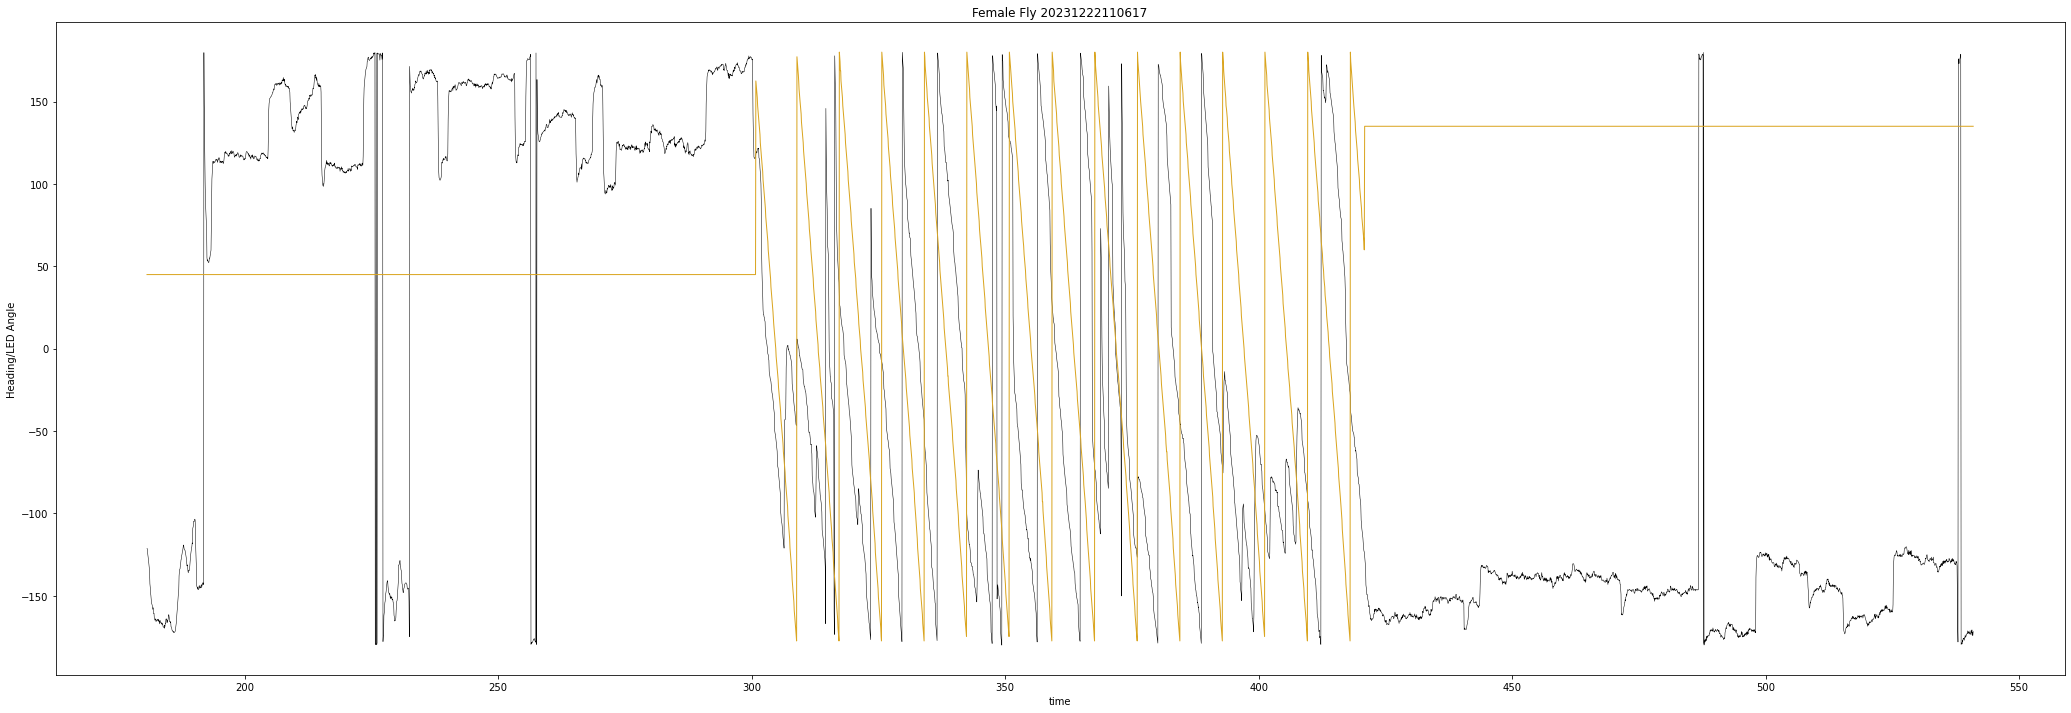

In [5]:
plt.figure(figsize=(36,12))
plt.plot(df_fem_loop['delta-t'][start_idx:end_idx],df_fem_loop['fly heading'][start_idx:end_idx],color = 'k', linewidth = .5, label = 'Heading')
plt.plot(df_fem_loop['delta-t'][start_idx:end_idx],df_fem_loop['led angle'][start_idx:end_idx],color = 'goldenrod', linewidth = 1, label = 'LED')
plt.title("Female Fly 20231222110617")
plt.xlabel("time")
plt.ylabel("Heading/LED Angle")

In [6]:
# get the subgroups that are appropriate for the current selection:
idx1 = (list(fem_dict_loop.keys())).index(find_startdata('stat',1,df_fem_loop, fem_dict_loop))
idx2 = (list(fem_dict_loop.keys())).index(find_enddata('stat',2,df_fem_loop, fem_dict_loop))
sub_groups = list(fem_dict_loop.keys())[idx1:idx2+1]
sub_groups

['stat1',
 'loop16',
 'loop17',
 'loop18',
 'loop19',
 'loop20',
 'loop21',
 'loop22',
 'loop23',
 'loop24',
 'loop25',
 'loop26',
 'loop27',
 'loop28',
 'loop29',
 'loop30',
 'stat2']

#### 2.3 Plot of Female Fly Data Relative To LED

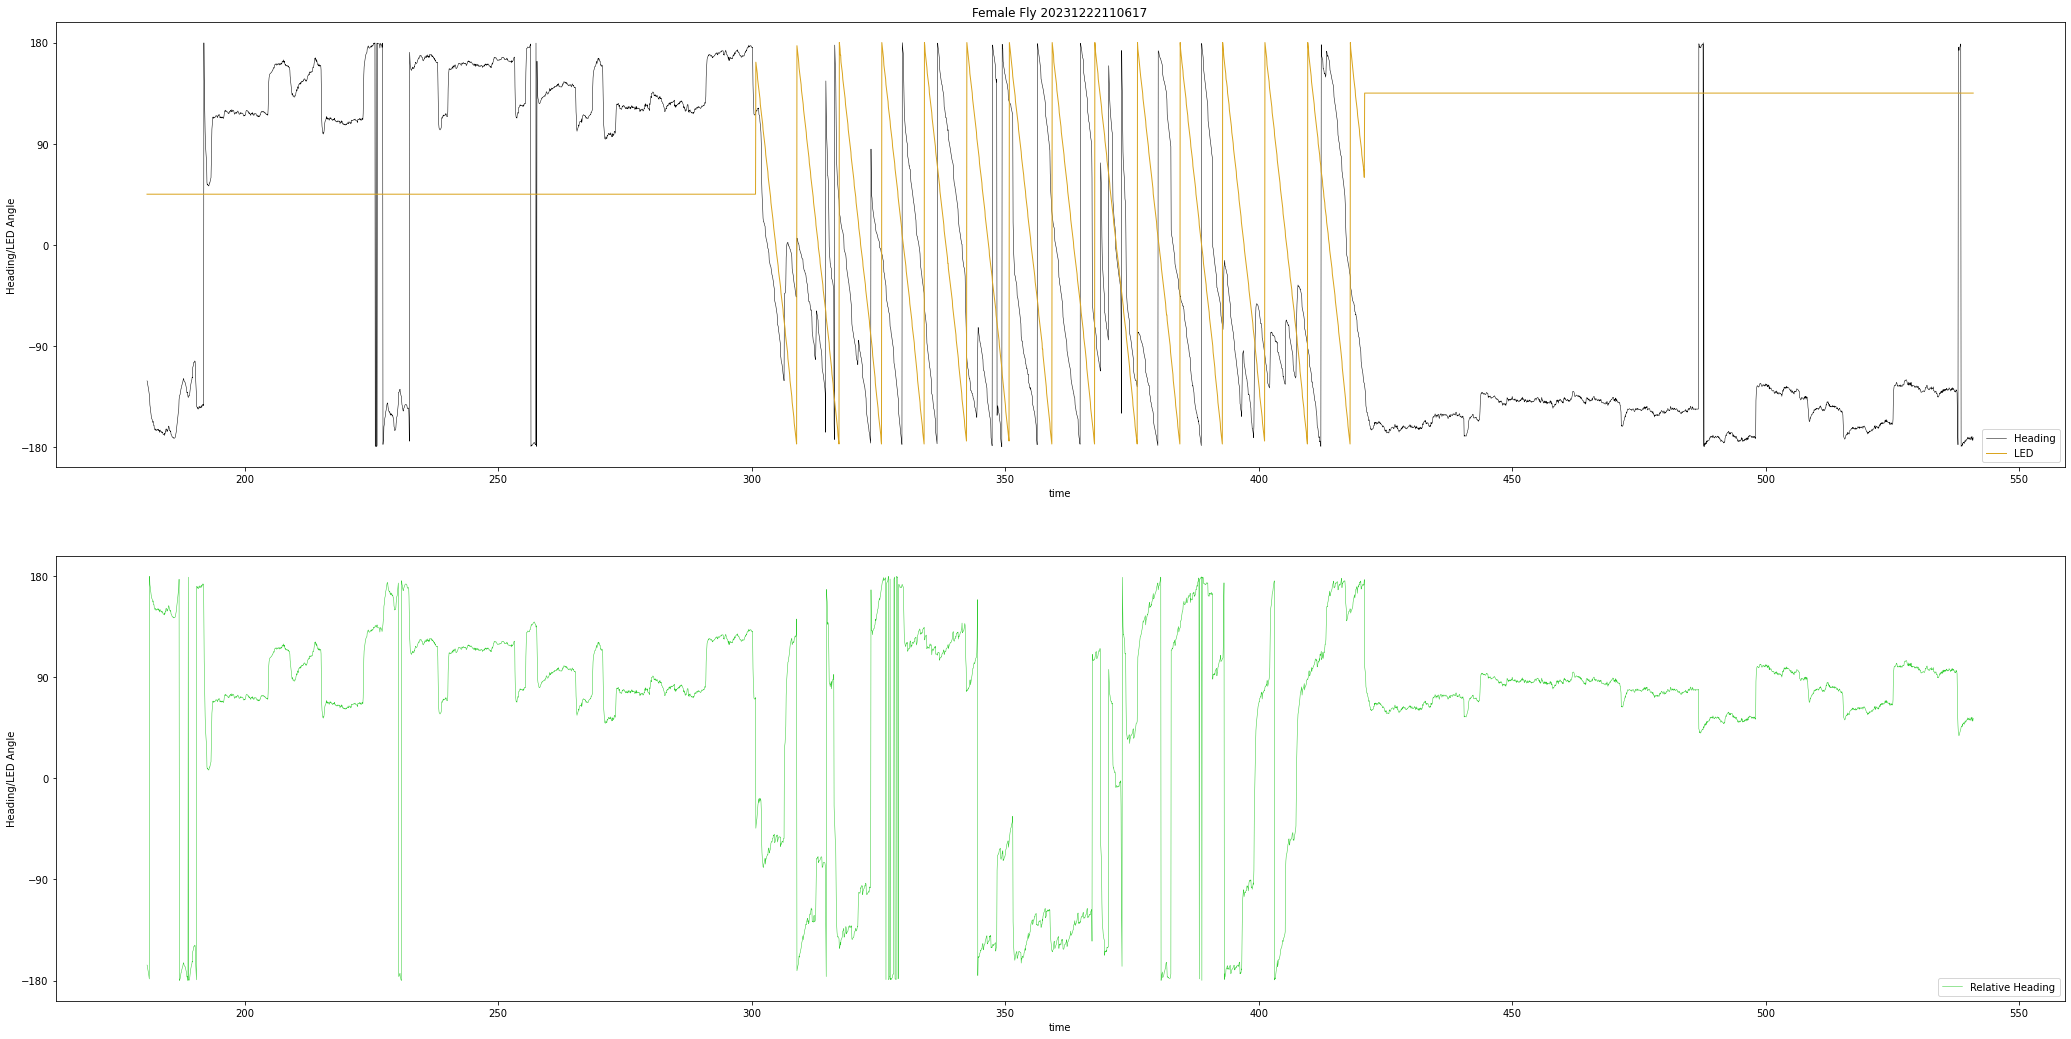

In [7]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(36,18))

# Main Plot 
ax1.plot(df_fem_loop['delta-t'][start_idx:end_idx],df_fem_loop['fly heading'][start_idx:end_idx],color = 'k', linewidth = .5, label = 'Heading')
ax1.plot(df_fem_loop['delta-t'][start_idx:end_idx],df_fem_loop['led angle'][start_idx:end_idx],color = 'goldenrod', linewidth = 1, label = 'LED')
ax1.set_title("Female Fly 20231222110617")
ax1.set_xlabel("time")
ax1.set_ylabel("Heading/LED Angle")
ax1.set_yticks(np.arange(-180,181,90))
ax1.legend(loc = "lower right")

# Offset
ax2.plot(df_fem_loop['delta-t'][start_idx:end_idx],polarplt.deg360to180_arr(df_fem_loop['fly heading'][start_idx:end_idx]-df_fem_loop['led angle'][start_idx:end_idx]),color = 'limegreen', linewidth = .5, label = 'Relative Heading')
ax2.set_xlabel("time")
ax2.set_ylabel("Heading/LED Angle")
ax2.set_yticks(np.arange(-180,181,90))
ax2.legend(loc = "lower right")

# Save Figure
plt.savefig('figs/offset_loop.svg',facecolor = 'white')

#### 2.4 Offset Plot for Loop Data

C:\Users\lkrow\AppData\Local\Temp\ipykernel_13364\4185248668.py:23: UserWarning: Legend does not support 'g' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(colors, labels)
C:\Users\lkrow\AppData\Local\Temp\ipykernel_13364\4185248668.py:23: UserWarning: Legend does not support 'b' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(colors, labels)
C:\Users\lkrow\AppData\Local\Temp\ipykernel_13364\4185248668.py:23: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(colors, labels)


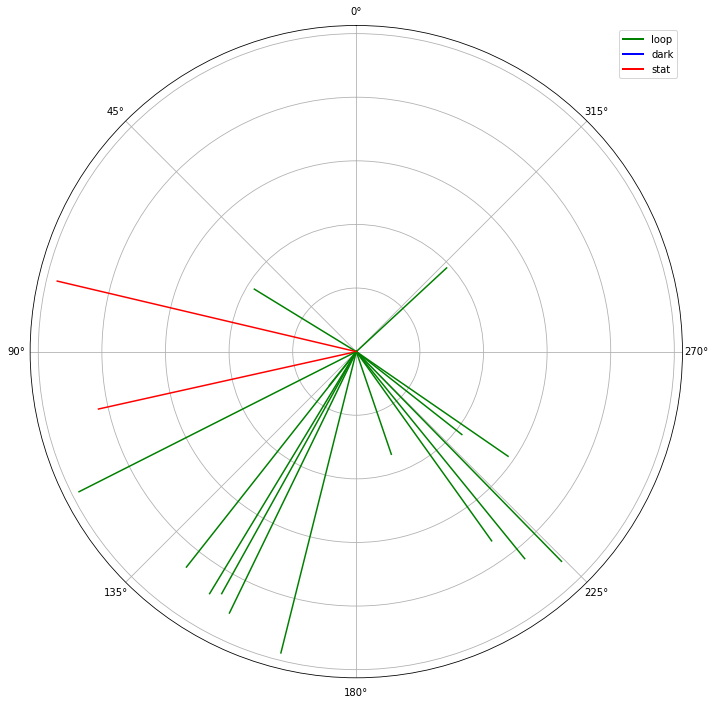

In [17]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(projection = 'polar')
colors = ['g','b','r']
labels = ['loop','dark','stat']
label_color =[["loop",'g'],['dark','b'],['static','r']]
label = ''
color = ''
for count, k in enumerate(sub_groups):
    for name_idx in range(len(labels)):
        if labels[name_idx] in k:
            idx = name_idx
            color = label_color[name_idx][1]


    start_f = fem_dict_loop[k][0]
    end_f = fem_dict_loop[k][1]
    vec_str , mean_drxn = polarplt.calc_mean_and_vector_strength(df_fem_loop['fly heading'][start_f:end_f]-df_fem_loop['led angle'][start_f:end_f])
    # print(f"Female Fly Data {df_fem_dat['delta-t'].loc[start_f]}-{df_fem_dat['delta-t'][end_f]}:")
    # print('Vector Strength:',vec_str,'\t','Mean Direction:',mean_drxn,'rads',np.rad2deg(mean_drxn),'degrees')
    # plt.polar(mean_drxn,vec_str,marker = 'o')
    ax.plot((0,mean_drxn),(0,vec_str), color = color,label = labels[name_idx])
    ax.set_yticklabels([])
plt.legend(colors, labels)
# print(leg.legend_handles)
# leg.legendHandles[0].set_color('green')
# leg.legendHandles[1].set_color('blue')
# leg.legendHandles[2].set_color('red')
legend_elements = [Line2D([0], [0], color=color, lw=2, label=label) for color, label in zip(colors, labels)]
ax.legend(handles = legend_elements)
ax.set_theta_zero_location("N")
plt.savefig('figs/polar_plot_loop.svg',facecolor = 'white')
plt.show()

#### 2.5 Offset Plot Polar Plot
... -> AKA just loop data for static and loop periods where it is the mean heading and vector strength realtive to LED
